### **Emotion Detection using CNN**

### Import libraries

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D,Dropout,BatchNormalization
from keras.layers import Flatten
from keras.layers import Dense
from keras.metrics import Precision
from keras.metrics import Recall
from keras.metrics import categorical_crossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
import keras


### Data augmentation using ImageDataGenerator
Initializing the train generator and test generator Using Keras ImageDataGenerator

Both generators are initialized with data normalization

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

### Read images directly from the train, validation and test folders

In [3]:
train_set = train_datagen.flow_from_directory(
    r"C:\Users\henis\OneDrive\Pictures\Screenshots\OneDrive\Desktop\AL_ML_Classnotes\ADL\Emotion Recognition\Dataset_Emotion_Recognition\data\train",
                                              target_size=(64,64),    
                                              batch_size= 32,
                                              shuffle=True , 
                                              color_mode='rgb',  
                                              class_mode='categorical')
test_set = test_datagen.flow_from_directory(r"C:\Users\henis\OneDrive\Pictures\Screenshots\OneDrive\Desktop\AL_ML_Classnotes\ADL\Emotion Recognition\Dataset_Emotion_Recognition\data\test",
                                              target_size=(64,64),    
                                              batch_size= 32,
                                              color_mode='rgb',
                                              shuffle=True,
                                              class_mode='categorical')
 
# Set class_mode to None, to return only the images.
#Set shuffle to False, because you need to yield the images in “order”, to predict the outputs and match them with their unique ids or filenames.
test_generator = test_datagen.flow_from_directory(
    directory=r"C:\Users\henis\OneDrive\Pictures\Screenshots\OneDrive\Desktop\AL_ML_Classnotes\ADL\Emotion Recognition\Dataset_Emotion_Recognition\data\test_images",
    target_size=(64,64),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)


Found 28820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Found 15 images belonging to 1 classes.


### Building a CNN network using Keras

In [4]:
def cnn_model():
    model= Sequential()
    model.add(Convolution2D(32, kernel_size=(5, 5), padding='same', activation='relu',input_shape=(64, 64,3)))
    model.add(Convolution2D(64,(5,5), padding='same', activation='relu' ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(128,(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(128,(3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten()) 
    model.add(Dense(32,activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
      
    model.add(Dense(64,activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(7, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'categorical_crossentropy', metrics=['accuracy',Precision(),Recall()])
    return model

model = cnn_model()



### Early stopping

In [5]:
#The ModelCheckpoint callback class allows you to define where to checkpoint the model weights, how to name the file, and under what circumstances to make a checkpoint of the model.
#The API allows you to specify which metric to monitor, such as loss or accuracy on the training or validation dataset. You can specify whether to look for an improvement in maximizing or minimizing the score. Finally, the filename you use to store the weights can include variables like the epoch number or metric.

#Adding checkpointer to implement Early Stopping to prevent overfitting.
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, 
                              restore_best_weights=True,mode="min",patience = 5),
                ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                                save_best_only=True,mode="min")]

history = model.fit(train_set,
                    validation_split=0.33,
                    epochs=10,   
                    verbose=1,
                    
                    batch_size=64,
                    callbacks=[checkpointer],
                    validation_data=test_set)

Epoch 1/10
901/901 [==============================] - ETA: 0s - loss: 1.7861 - accuracy: 0.2773 - precision: 0.4587 - recall: 0.0264
Epoch 1: val_accuracy improved from inf to 0.33711, saving model to best_model.h5
901/901 [==============================] - 956s 1s/step - loss: 1.7861 - accuracy: 0.2773 - precision: 0.4587 - recall: 0.0264 - val_loss: 1.6621 - val_accuracy: 0.3371 - val_precision: 0.5273 - val_recall: 0.1748
Epoch 2/10


C:\Users\henis\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


901/901 [==============================] - ETA: 0s - loss: 1.6240 - accuracy: 0.3600 - precision: 0.6315 - recall: 0.1038
Epoch 2: val_accuracy did not improve from 0.33711
901/901 [==============================] - 839s 931ms/step - loss: 1.6240 - accuracy: 0.3600 - precision: 0.6315 - recall: 0.1038 - val_loss: 1.5119 - val_accuracy: 0.4066 - val_precision: 0.6745 - val_recall: 0.2103
Epoch 3/10
901/901 [==============================] - ETA: 0s - loss: 1.5581 - accuracy: 0.3918 - precision: 0.6631 - recall: 0.1416
Epoch 3: val_accuracy did not improve from 0.33711
901/901 [==============================] - 792s 879ms/step - loss: 1.5581 - accuracy: 0.3918 - precision: 0.6631 - recall: 0.1416 - val_loss: 1.5138 - val_accuracy: 0.4206 - val_precision: 0.7455 - val_recall: 0.1244
Epoch 4/10
901/901 [==============================] - ETA: 0s - loss: 1.4954 - accuracy: 0.4228 - precision: 0.6768 - recall: 0.1758
Epoch 4: val_accuracy did not improve from 0.33711
901/901 [================

### Plotting model loss and accuracy

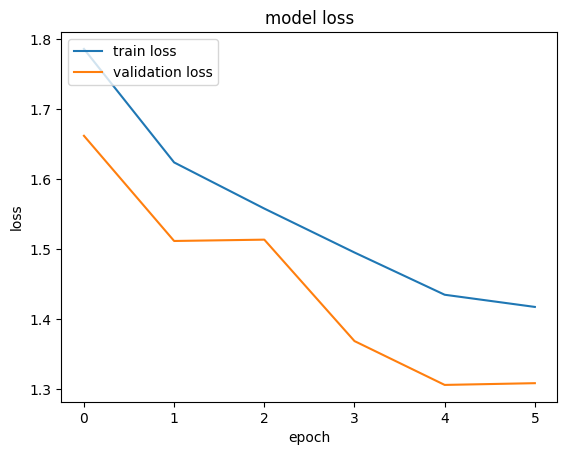

In [6]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


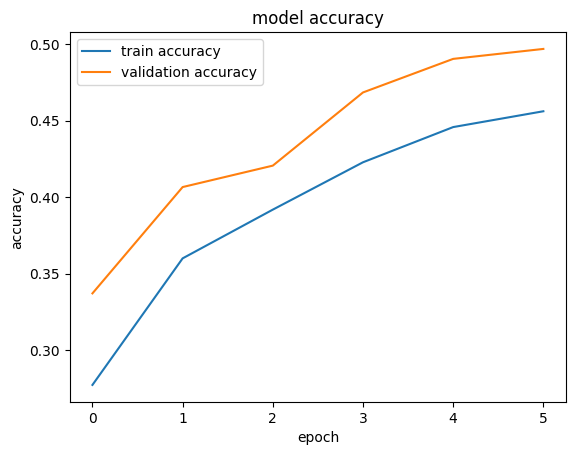

In [7]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='upper left')
plt.show()

In [8]:
# Evaluate the model
model.evaluate(test_set)

221/221 [==============================] - 52s 234ms/step - loss: 1.6621 - accuracy: 0.3371 - precision: 0.5273 - recall: 0.1748


[1.6620557308197021,
 0.33710727095603943,
 0.5273270606994629,
 0.17478063702583313]

### Predict the output

In [9]:
#You need to reset the test_generator before whenever you call the predict_generator. This is important, if you forget to reset the test_generator you will get outputs in a weird order.
test_generator.reset()
pred = model.predict(test_generator, steps= test_generator.n, verbose=1)
print('Test loss:', pred[0]) 
print('Test accuracy:', pred[1])

15/15 [==============================] - 0s 11ms/step
Test loss: [0.04268905 0.00719889 0.06218933 0.76949966 0.06006296 0.0416866
 0.01667347]
Test accuracy: [0.10369247 0.01651551 0.0865669  0.4095885  0.2224242  0.11412268
 0.04708975]


### Evaluating the model on test images

In [12]:
import numpy as np

predicted_class_indices=np.argmax(pred,axis=1)
predicted_class_indices

array([3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 4, 4, 6, 6, 6], dtype=int64)

In [13]:
labels = train_set.class_indices
labels = dict((v,k) for k,v in labels.items())
print(labels)
predictions = [labels[k] for k in predicted_class_indices]
print(predictions)

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
['happy', 'happy', 'happy', 'neutral', 'happy', 'happy', 'happy', 'happy', 'neutral', 'happy', 'neutral', 'neutral', 'surprise', 'surprise', 'surprise']


### Test images and their predicted lables

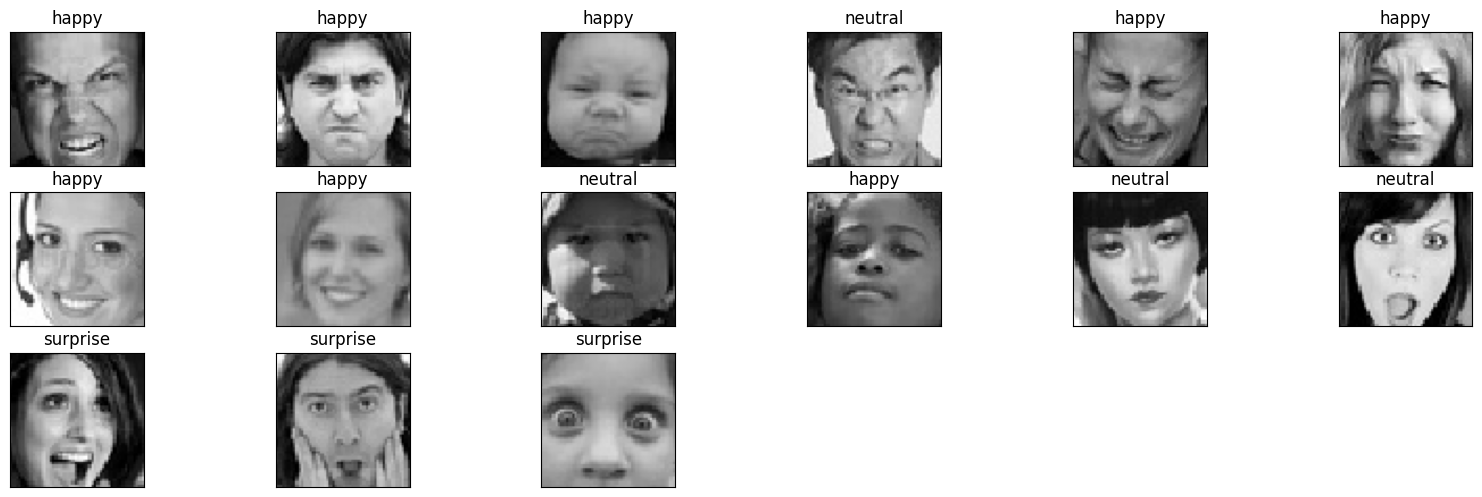

In [14]:
figure = plt.figure(figsize=(20, 8))
for i in range(len(test_generator)):
    ax = figure.add_subplot(4,6, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_generator[i]))
    ax.set_title(predictions[i])

### Conclusion
1) Built a CNN model to detect the emotion of the human faces
2) Plotted model loss and accuracy
3) showed the test images and their predicted expressions